on random oversampling the best hyperparameters with accuracy 91% are:
best_n_estimator = 195, best_max_depth = 22, best_min_child_weight = 1

## import libraries

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

from xgboost import XGBClassifier 

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import RocCurveDisplay 

import warnings 
warnings.filterwarnings('ignore')

## load dataset

In [2]:
# load random oversampling data
X_ros_train = pd.read_csv('data/ros/X_ros_train.csv')
X_ros_test = pd.read_csv('data/ros/X_ros_test.csv')

y_ros_train = pd.read_csv('data/ros/y_ros_train.csv')
y_ros_test = pd.read_csv('data/ros/y_ros_test.csv')

## train the best XGBoost model

In [3]:
## XGBoost hyperparameters
best_n_estimator = 195
best_max_depth = 22
best_min_child_weight = 1 # default 

In [4]:
# model creation
model_xgboost = XGBClassifier(
    n_estimators=best_n_estimator, max_depth=best_max_depth, 
    min_child_weight =best_min_child_weight, random_state=7)

In [5]:
# model training
history = model_xgboost.fit(X_ros_train, y_ros_train)
display(history)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=22, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=195, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=7, ...)

### evaluate the model's performance

In [7]:
# predict the test set
y_pred = model_xgboost.predict(X_ros_test)

In [11]:
accuracy = accuracy_score(y_true=y_ros_test, y_pred=y_pred)
print(f'{accuracy = }')

accuracy = 0.9193118185646769


<AxesSubplot: >

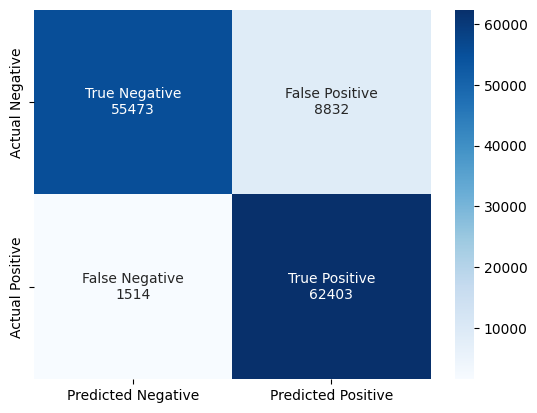

In [12]:
cf_matrix = confusion_matrix(y_true=y_ros_test, y_pred=y_pred)

# preparing the labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten() ]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(2, 2)
axxlabels = ['Predicted Negative', 'Predicted Positive']
axylabels = ['Actual Negative', 'Actual Positive']


# plotting the confusion matrix
sns.heatmap(cf_matrix, annot=annotations, 
            fmt='', xticklabels=axxlabels, yticklabels=axylabels, 
            cmap=sns.color_palette('Blues', as_cmap=True))

In [13]:
# calculate accuracy, sensitivity & specifity
tn = cf_matrix.flatten()[0] # true negative
fp = cf_matrix.flatten()[1] # false positive
fn = cf_matrix.flatten()[2] # false negative
tp = cf_matrix.flatten()[3] # true positive

accuracy_score = (tp + tn) / (tn + fp + fn + tp) * 100
tpr = (tp / (tp + fn)) * 100
tnr = (tn / (tn + fp)) * 100

print(f'accuracy score is {accuracy_score}')
print(f'true positive rate is {tpr}')
print(f'true negative rate is {tnr}')

accuracy score is 91.93118185646769
true positive rate is 97.6313030962029
true negative rate is 86.26545369722417


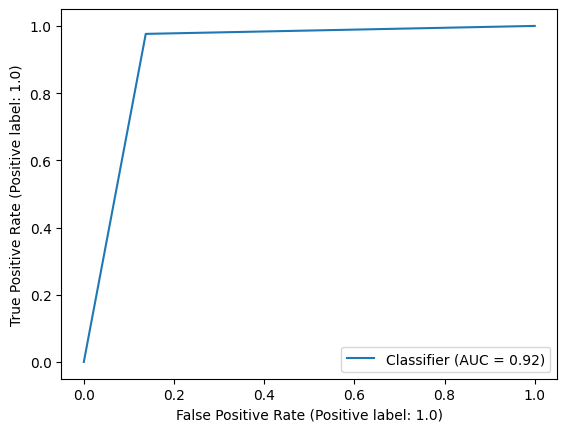

In [14]:
RocCurveDisplay.from_predictions(y_true=y_ros_test, y_pred=y_pred, pos_label=1.0)